<a href="https://www.kaggle.com/code/sayidheykal/classification-water-quality?scriptVersionId=213302531" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Project Description: Water Quality Prediction for Public Health Protection**

## **Goal**

The primary goal of this project is to protect public health by identifying unsafe water sources to help prevent waterborne diseases. By leveraging machine learning techniques, the project aims to build a predictive model that determines whether water is potable (safe for consumption) or non-potable (unsafe).

## **Dataset Description**

The dataset utilized for this project focuses on Water Quality Prediction, a vital area for public health and environmental safety. It contains attributes that measure the physical, chemical, and biological properties of water. The features and their descriptions are as follows:
1. pH: Indicates the acidity or alkalinity of the water (range: 0 to 14).
2. Hardness: Measures the capacity of water to precipitate soap, expressed in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of chloramines in ppm.
5. Sulfate: Amount of sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic Carbon: Quantity of organic carbon in ppm.
8. Trihalomethanes: Amount of trihalomethanes in μg/L.
9. Turbidity: Measure of water’s light-emitting properties in NTU.
10. Potability: Target variable, where:
11. 1 indicates potable (safe) water.
12. 0 indicates non-potable (unsafe) water.

This dataset is critical for assessing water quality and provides an excellent basis for applying machine learning models to predict potability.

## **Machine Learning Algorithms**

Several machine learning algorithms will be applied and compared to identify the best-performing model for water quality prediction:
1. Logistic Regression:
    - A baseline model for binary classification.
    - Provides interpretable results and works well on linearly separable data.
2. Support Vector Machine (SVM):
    - Effective for high-dimensional datasets.
    - Handles non-linear decision boundaries with the use of kernels.
3.	K-Nearest Neighbors (KNN):
    - A simple yet effective algorithm for small to medium-sized datasets.
    - Classifies water samples based on the majority class of the nearest neighbors.
4.	Decision Tree:
    - A non-linear algorithm that provides interpretable decision rules.
    - Captures complex relationships between features and the target variable.

_`Each algorithm will be evaluated based on its performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.`_

## **Expected Outcomes**

- Develop an accurate predictive model that can classify water as potable or non-potable.
- Gain insights into the most significant factors affecting water potability.
- Create a model that aids public health initiatives by enabling early identification of unsafe water sources, thereby reducing waterborne illnesses and improving resource allocation.

>**This project has the potential to contribute meaningfully to public health protection, ensuring safer water supplies for communities worldwide.**

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import Popen, PIPE
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from IPython.display import display
import os

import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

In [59]:
INPUT_DIR = '/kaggle/input/water-potability/'
WORKING_DIR = '/kaggle/working/'

In [60]:
input_dataset = os.path.join(INPUT_DIR, 'water_potability.csv')

df = pd.read_csv(input_dataset)

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [61]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


None

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

**SUMMARY** <br>
- All datatypes has declared as the content
- For convenient column names would replace into lowercase
- The dataset has a missing values which we'll handle it later
- Almost in every features indicates a big differences range of values between max value and Q3 Value. Which potentially indicated as *outliers*.
- Ununiformed scale of feature values, which is normal and we'll handle it in normalization section.

**STEPS** <br>
- Replace column names into lowercase
- Handling Missing values
- EDA (Identify patterns, correlations, or outliers)
- Scaling a values

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat_split.split(df, df['Potability']):
    train_split = df.iloc[train_index]
    test_split = df.iloc[test_index]

train_data = train_split.drop(columns=['Potability'])
train_target = train_split['Potability']

test_data = test_split.drop(columns=['Potability'])
test_target = test_split['Potability']

train_split.shape, test_split.shape, train_target.shape, test_target.shape

((2620, 10), (656, 10), (2620,), (656,))

# **Data Cleansing**

## **1. Lowercasing Column Names**

In [63]:
class LowerColumnNames(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X.columns = X.columns.str.lower()
        return X

train_cleaned = train_data.copy()
print(f"Columns before lowercased:\n \33[32m{df.columns}\33[0m\n")
train_cleaned = LowerColumnNames().fit_transform(train_cleaned)

print(f"Columns after lowercased:\n \33[32m{train_cleaned.columns}\33[0m\n")
train_cleaned.info()

train_split = LowerColumnNames().fit_transform(train_split)

Columns before lowercased:
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Columns after lowercased:
 Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 2620 entries, 2214 to 264
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2233 non-null   float64
 1   hardness         2620 non-null   float64
 2   solids           2620 non-null   float64
 3   chloramines      2620 non-null   float64
 4   sulfate          1995 non-null   float64
 5   conductivity     2620 non-null   float64
 6   organic_carbon   2620 non-null   float64
 7   trihalomethanes  2486 non-null   float64
 8   turbidity        2620 non-null   float64
dtypes

In [64]:
features = train_cleaned.columns.tolist()
all_cols = train_split.columns.tolist()

features, all_cols

(['ph',
  'hardness',
  'solids',
  'chloramines',
  'sulfate',
  'conductivity',
  'organic_carbon',
  'trihalomethanes',
  'turbidity'],
 ['ph',
  'hardness',
  'solids',
  'chloramines',
  'sulfate',
  'conductivity',
  'organic_carbon',
  'trihalomethanes',
  'turbidity',
  'potability'])

## **Handling Missing Values**

In [65]:
missing_values = train_cleaned.isna().sum()
print(f'Missing values:\n-------------\n{missing_values}')

Missing values:
-------------
ph                 387
hardness             0
solids               0
chloramines          0
sulfate            625
conductivity         0
organic_carbon       0
trihalomethanes    134
turbidity            0
dtype: int64


features  count_missing
0               ph            387
1         hardness              0
2           solids              0
3      chloramines              0
4          sulfate            625
5     conductivity              0
6   organic_carbon              0
7  trihalomethanes            134
8        turbidity              0

Number of rows with missing values: 1013
Percentage of all missing values: 38.66%


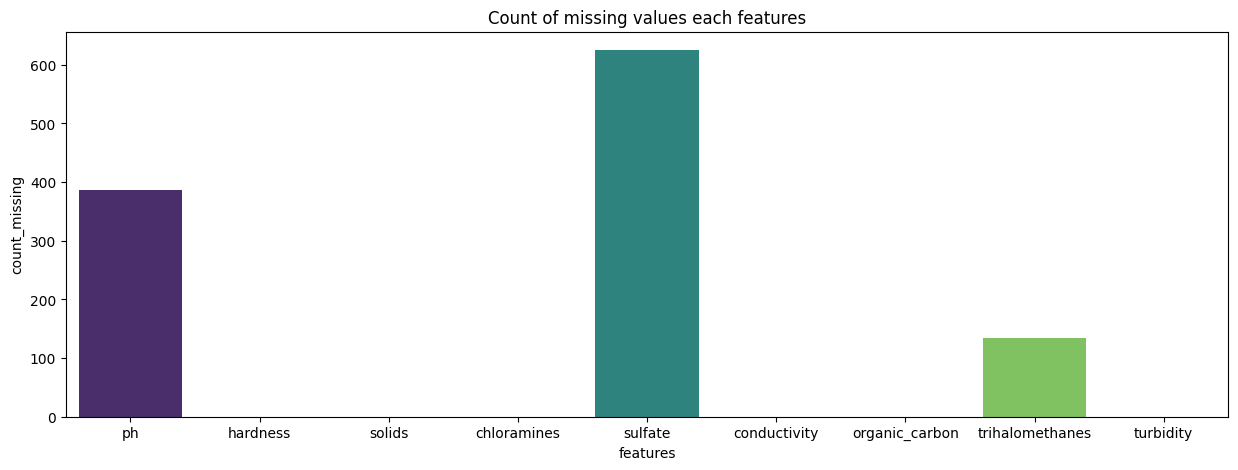

In [66]:
def plot_missing_values(df):
    missing_values = df.isna().sum()
    missing_values_df = missing_values.reset_index().rename(
        columns={'index':'features', 0:'count_missing'}
    )
    
    rows_with_nan = df[df.isnull().any(axis=1)]
    missing_values_percentage = len(rows_with_nan) / len(df) * 100
    
    display(missing_values_df)
    
    print(f'Number of rows with missing values: {len(rows_with_nan)}')
    print(f'Percentage of all missing values: {missing_values_percentage:.2f}%')
    
    plt.figure(figsize=(15,5))
    sns.barplot(missing_values_df, x='features', y='count_missing', palette='viridis')
    plt.title('Count of missing values each features')

plot_missing_values(train_cleaned)

**SUMMARY** :<br>
- Missing values are reaching up to 38% of data, which is high. 
- We should use the appropriate method for handling. However, dropping it might causes loss a lot of information. Hence, the only way we going to do is the imputation.
- Due to the dataset is crusial for imputation to be a pricise value (In terms of our dataset contains public health quality). Doing a simple imputation might causes a bias. Hence, we will do the multiple imputation

**STRATEGY**: <br>
- Implement MICE (Multiple Imputation by Chained Equations). Ref of explanation from <a href="https://www.machinelearningplus.com/machine-learning/mice-imputation/">Here.</a>
- Using `MICEData` method from `statsmodels` library to apply multiple imputer on missing values. To do that, the prediction values will apply as n-times, which it generates new dataset with different random values each.
- Use a final dataset to train model.

features  count_missing
0               ph              0
1         hardness              0
2           solids              0
3      chloramines              0
4          sulfate              0
5     conductivity              0
6   organic_carbon              0
7  trihalomethanes              0
8        turbidity              0

Number of rows with missing values: 0
Percentage of all missing values: 0.00%


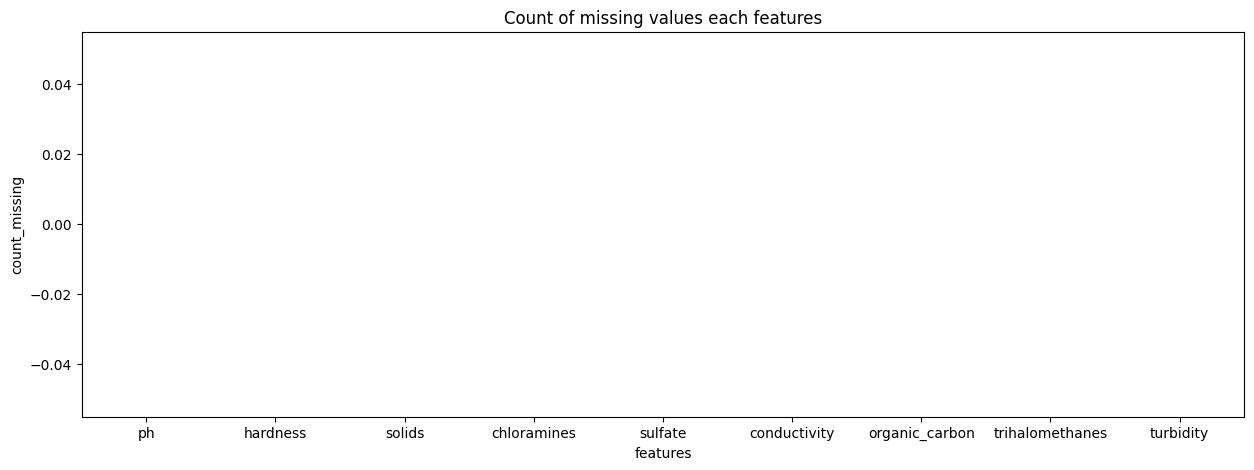

In [67]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

class MultipleImputer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imp = IterativeImputer(random_state=9122024)
        return pd.DataFrame(imp.fit_transform(X), columns=features)
        
train_cleaned = MultipleImputer().fit_transform(train_cleaned)

plot_missing_values(train_cleaned)

# **EDA**

## **1. Distribution**

In [68]:
def plot_cols_dist(df, columns, suptitle="Features distribution"):
    """Plot the distribution of the specified columns in the DataFrame."""
    if len(columns) == 1:
        n_cols = 1
        n_rows = 1
    else:
        n_cols = 5
        n_rows = len(columns) // n_cols + (1 if len(columns) % n_cols > 0 else 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    plt.suptitle(suptitle)
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i], color="blue", bins=30)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Remove any unused axes
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.show()

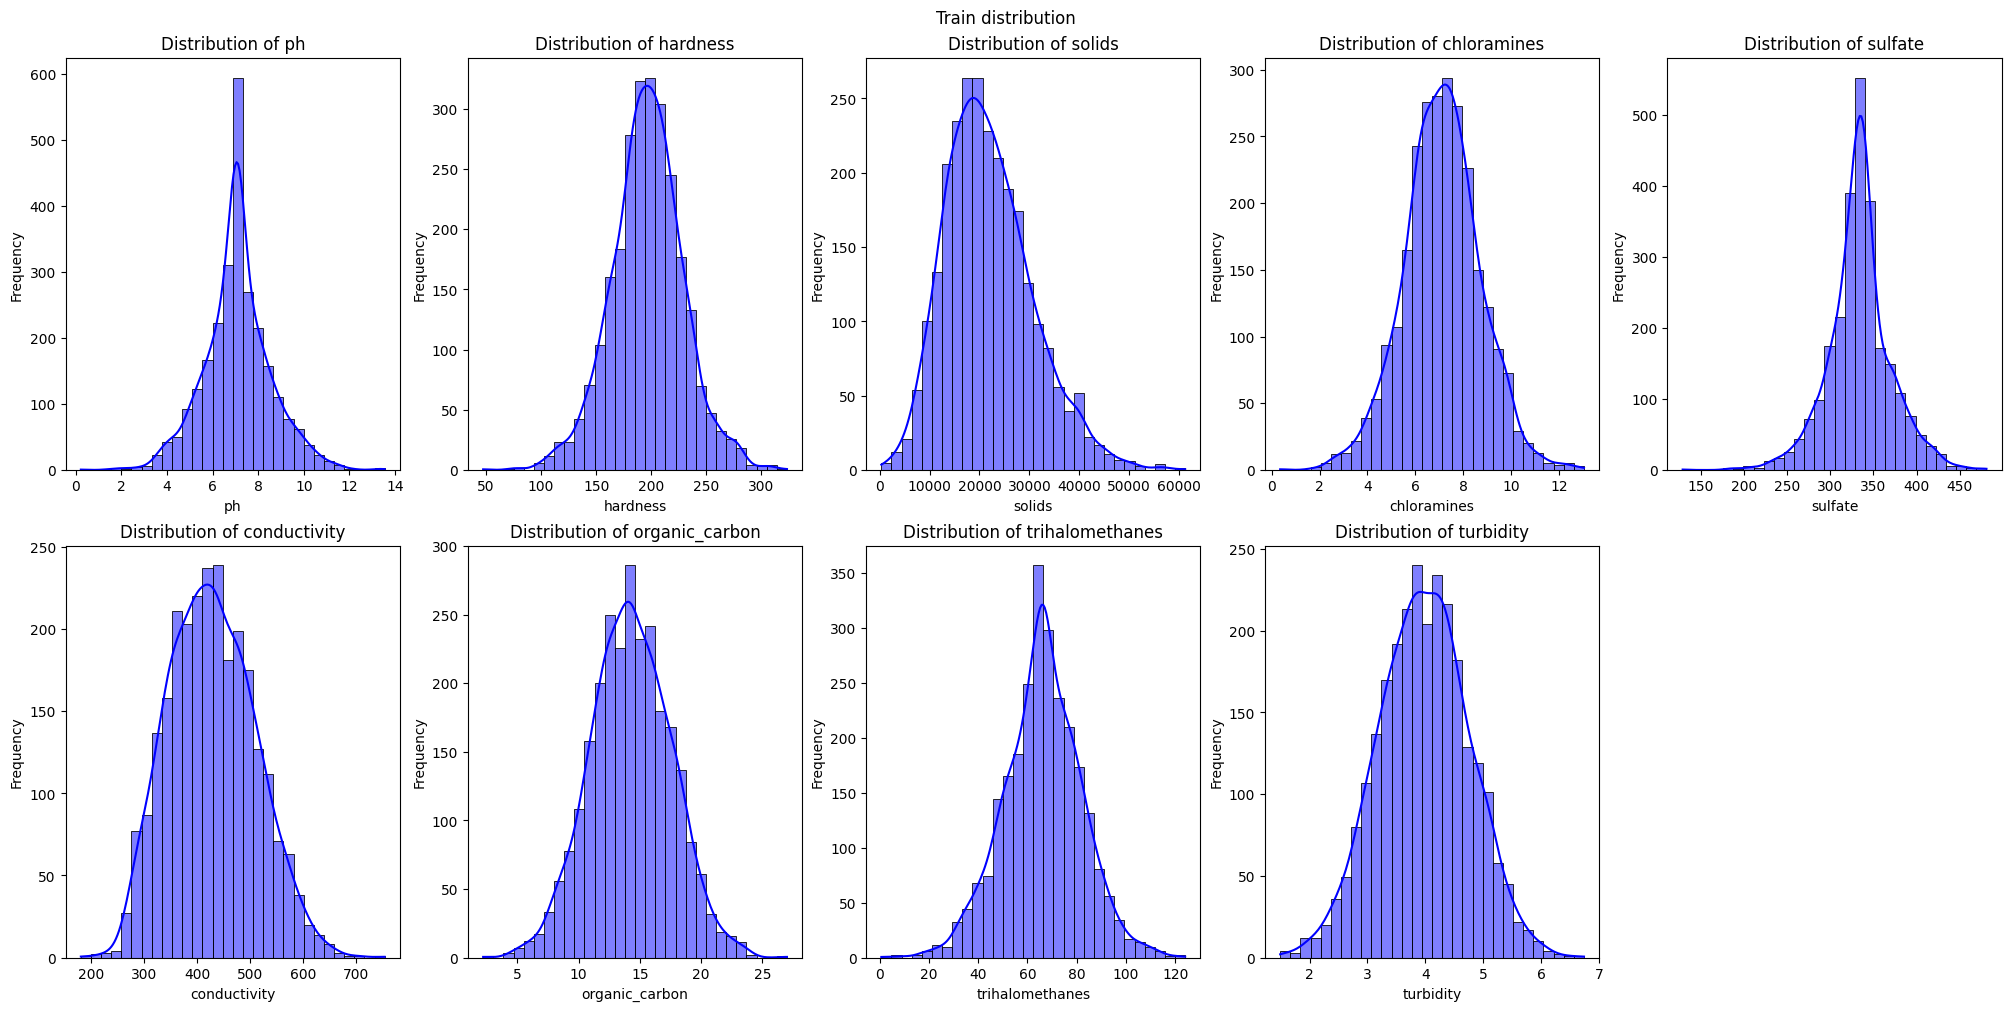

None

In [69]:
display(plot_cols_dist(train_cleaned, columns=features, suptitle="Train distribution"))

<Axes: >

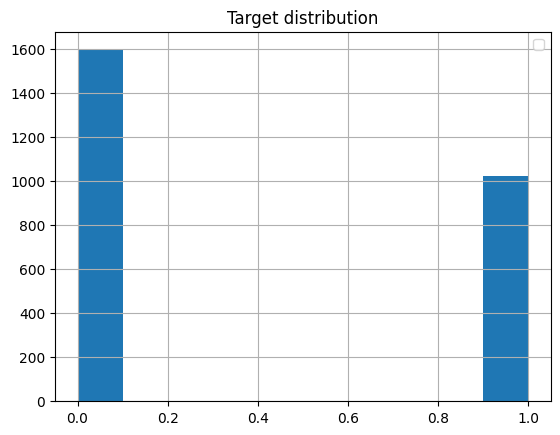

In [70]:
display(train_target.hist())
plt.title('Target distribution')
plt.legend()
plt.show()

## **2. Correlation**

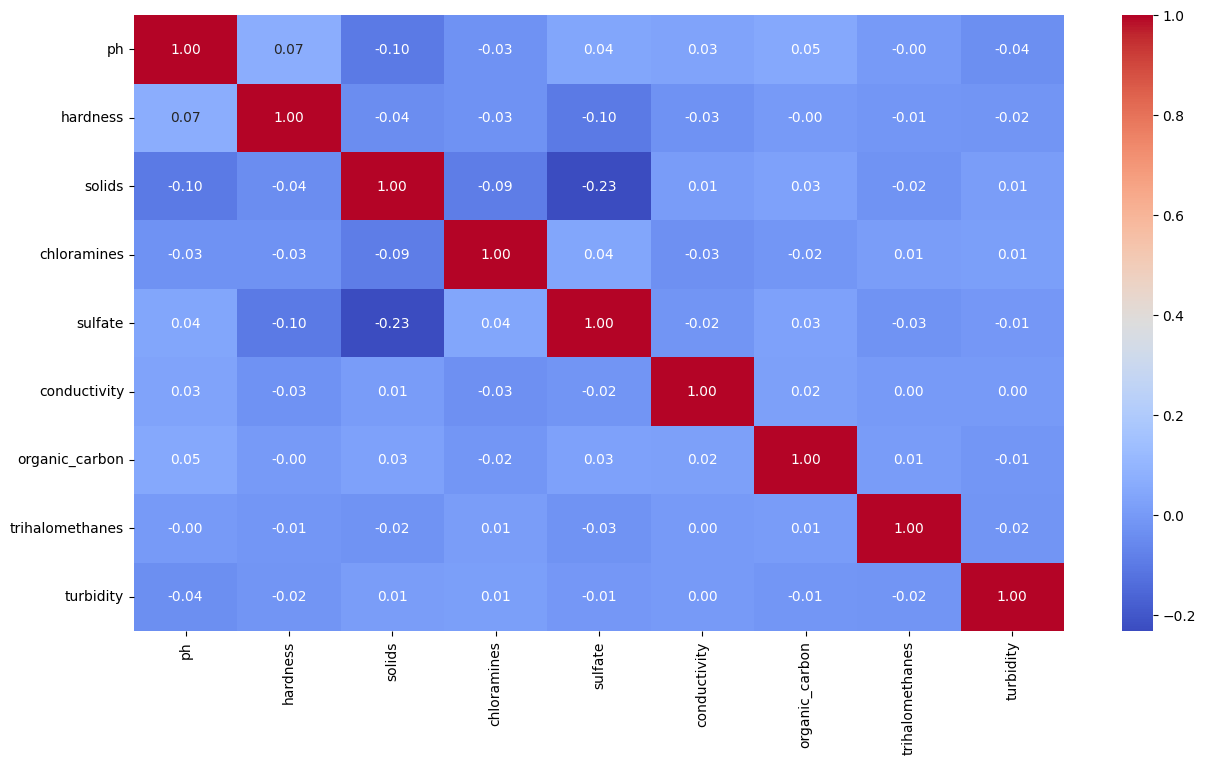

In [71]:
def plot_corr(df):
    mat_corr = df.corr()
    plt.figure(figsize=(15,8))
    sns.heatmap(mat_corr, annot=True, fmt='.2f', cmap='coolwarm')

plot_corr(train_cleaned)

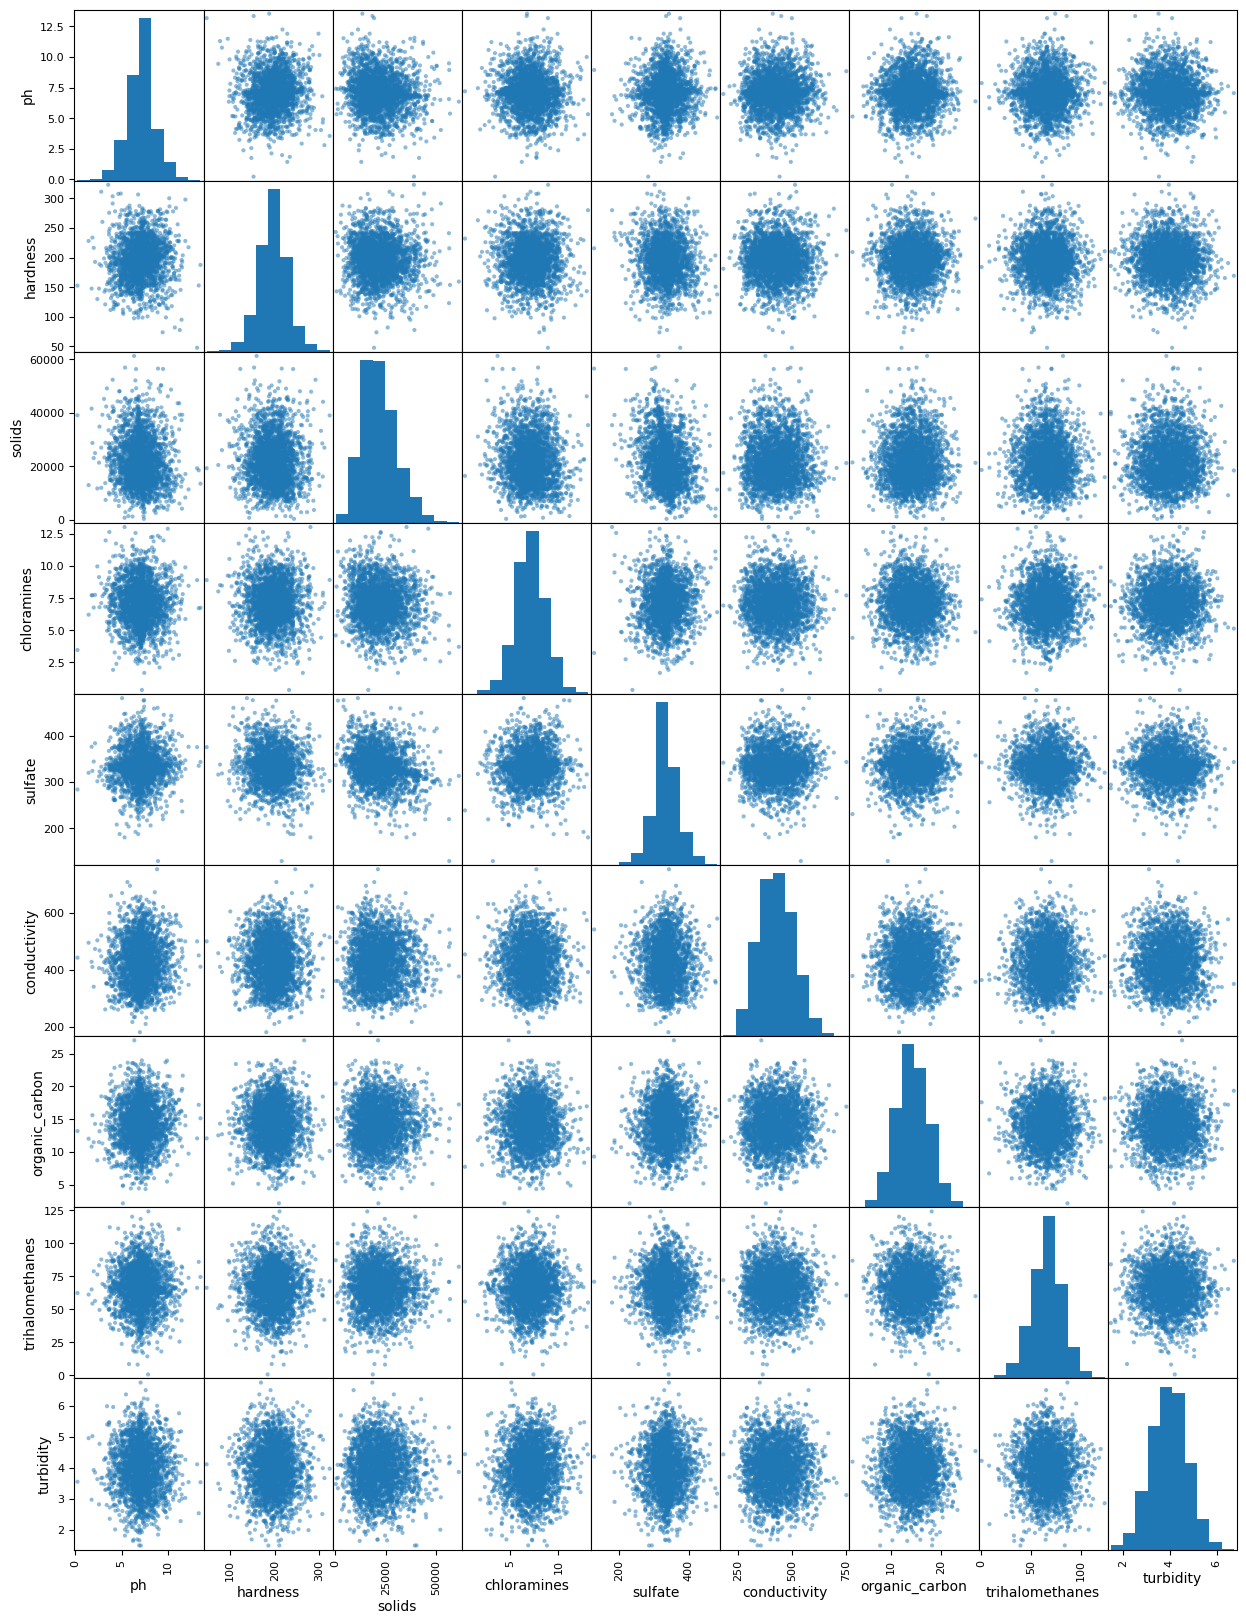

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_cleaned[features], figsize=(15,20))
plt.show()

## **2. Handling an Outliers**

<Figure size 500x800 with 0 Axes>

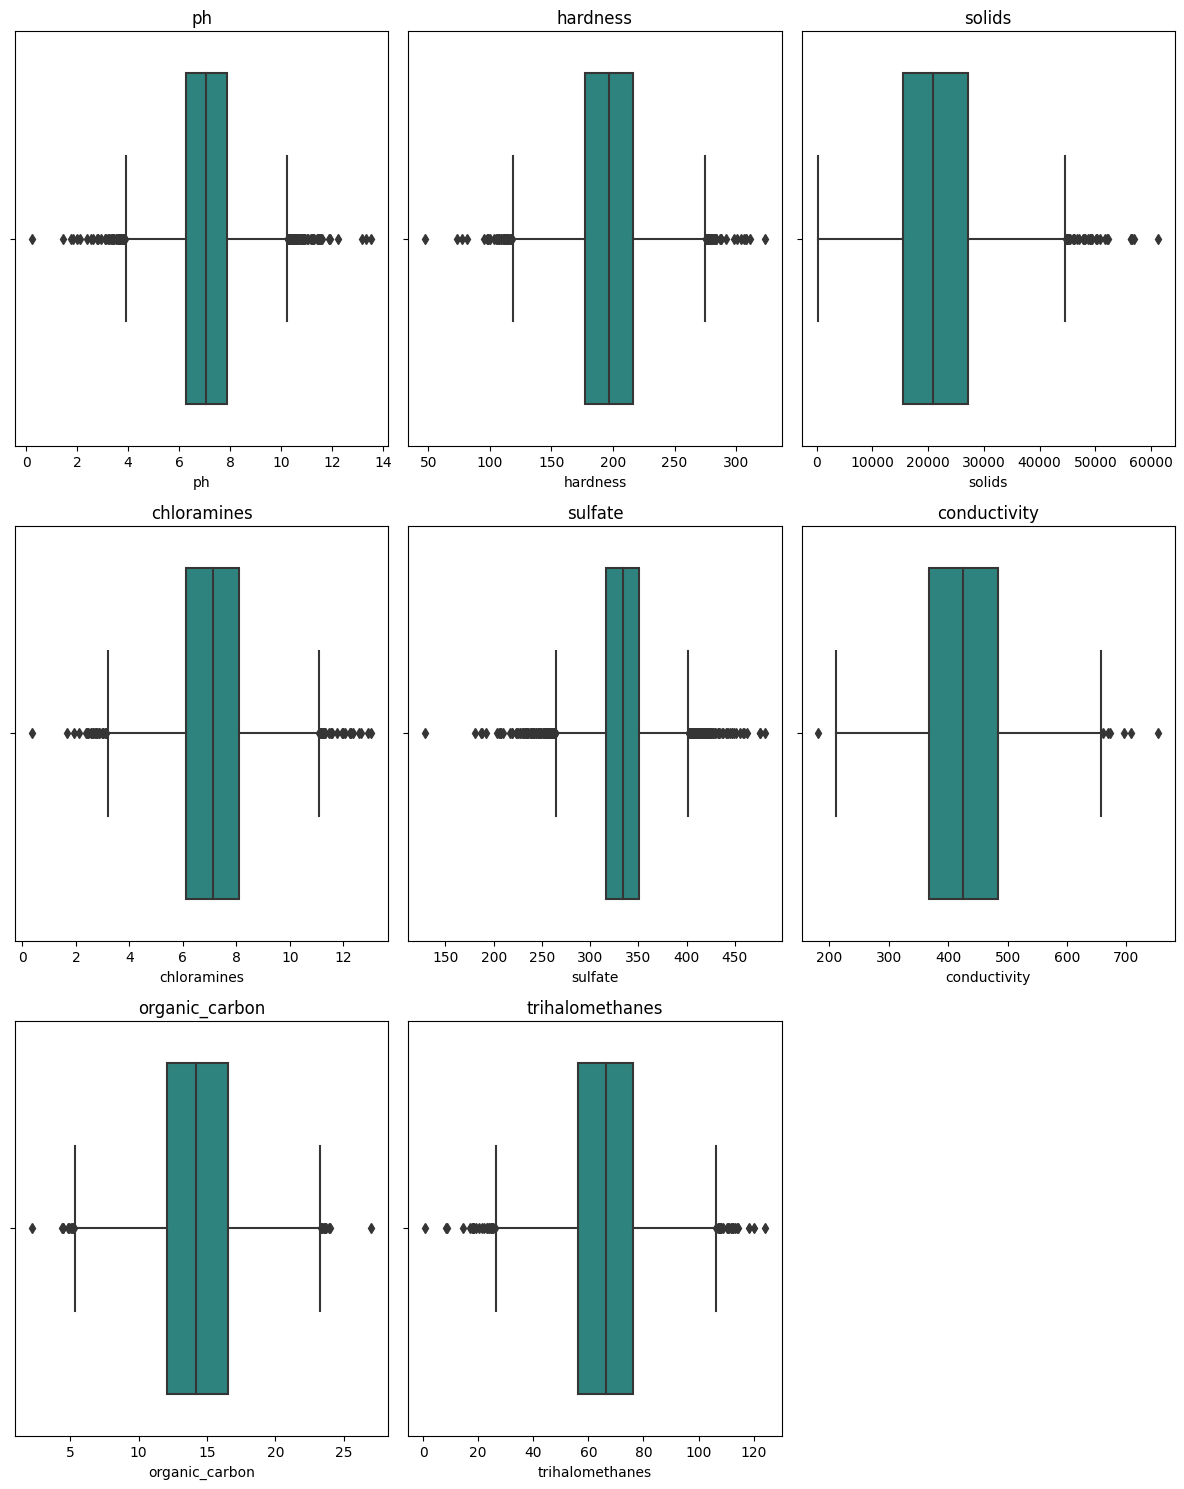

In [73]:
def plot_cols_boxplot(df, features):
    plt.figure(figsize=(5,8))
    
    ncols = 3
    nrows = len(features) // ncols + (1 if len(features) % ncols > 0 else 0)
    fig, axes = plt.subplots(figsize=(12, 5*nrows), nrows=nrows, ncols=ncols)
    
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < len(features)-1:  # Check if the index is within bounds, minus 1 for exclude the potability
            sns.boxplot(data=df, x=features[i], ax=ax, palette='viridis')
            ax.set_title(features[i])
        else:
            ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_cols_boxplot(train_cleaned, features)

column    Potability  Count
0                ph  potability_0     27
1          hardness  potability_0     34
2            solids  potability_0     19
3       chloramines  potability_0     25
4           sulfate  potability_0     10
5      conductivity  potability_0      6
6    organic_carbon  potability_0     15
7   trihalomethanes  potability_0     14
8         turbidity  potability_0      8
9        potability  potability_0      0
10               ph  potability_1      8
11         hardness  potability_1     39
12           solids  potability_1     17
13      chloramines  potability_1     28
14          sulfate  potability_1     24
15     conductivity  potability_1      1
16   organic_carbon  potability_1      5
17  trihalomethanes  potability_1     12
18        turbidity  potability_1      6
19       potability  potability_1      0

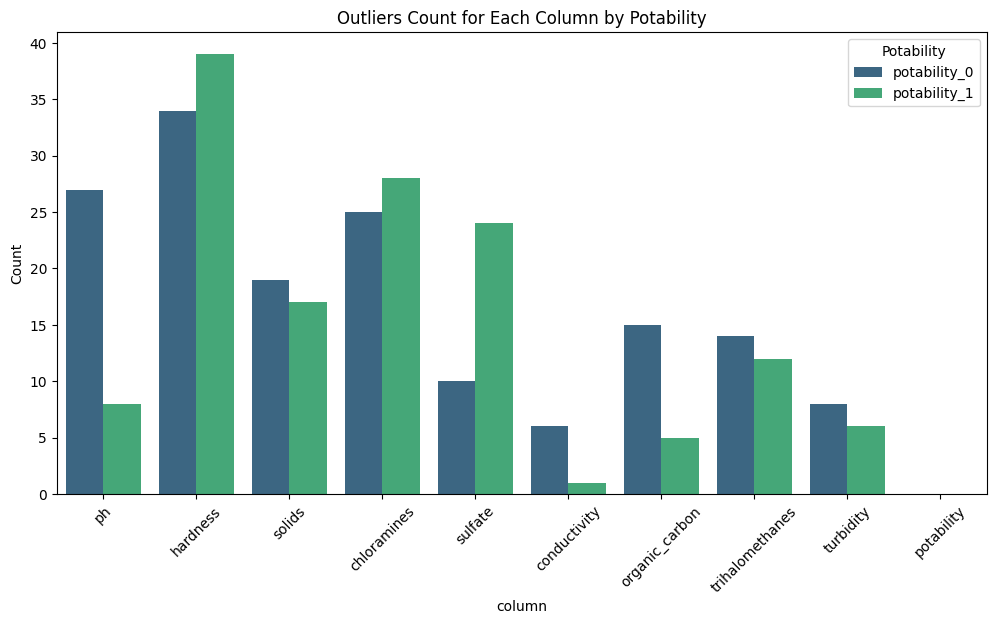

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Dataset with imputed data (replace train_split with your actual DataFrame)
q1 = train_split.quantile(0.25)
q3 = train_split.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Dictionary to store outliers summary
outliers_summary = {
    'column': [],
    'potability_0': [],
    'potability_1': [],
}

# Calculate outliers for each feature
for col in all_cols:  # Replace 'features' with the list of your feature column names
    outliers = train_split[(train_split[col] < lower_bound[col]) | (train_split[col] > upper_bound[col])]
    outliers_summary['column'].append(col)
    outliers_summary['potability_0'].append(len(outliers[outliers['potability'] == 0]))
    outliers_summary['potability_1'].append(len(outliers[outliers['potability'] == 1]))

# Convert to DataFrame
outliers_summary_df = pd.DataFrame(outliers_summary)

# Melt the DataFrame for better visualization
outliers_summary_melted = outliers_summary_df.melt(id_vars='column', var_name='Potability', value_name='Count')
display(outliers_summary_melted)
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=outliers_summary_melted, x='column', y='Count', hue='Potability', palette='viridis')
plt.title("Outliers Count for Each Column by Potability")
plt.xticks(rotation=45)
plt.show()

In [75]:
# Count if the rows has an existing outliers of column
rows_with_outliers = train_split[train_split[(train_split < lower_bound) | (train_split > upper_bound)].any(axis=1)]
potability_0_outliers = rows_with_outliers[rows_with_outliers['potability'] == 0]
potability_1_outliers = rows_with_outliers[rows_with_outliers['potability'] == 1]

outliers_percentage = len(rows_with_outliers) / len(train_split) * 100
potability_0_outliers_percentage = len(potability_0_outliers) / len(train_split) * 100
potability_1_outliers_percentage = len(potability_1_outliers) / len(train_split) * 100

print(f"Number of rows with outliers: \33[33m{len(rows_with_outliers)}\33[0m")
print(f"Number of potability rows with outliers: \33[33m{len(potability_0_outliers)}\33[0m")
print(f"Number of non-potability rows with outliers: \33[33m{len(potability_1_outliers)}\33[0m\n")
print(f"Percentage of rows with outliers: \33[33m{outliers_percentage:.2f}%\33[0m")
print(f"Percentage of potability rows with outliers: \33[33m{potability_0_outliers_percentage:.2f}%\33[0m")
print(f"Percentage of non-potability with outliers: \33[33m{potability_1_outliers_percentage:.2f}%\33[0m")

Number of rows with outliers: 267
Number of potability rows with outliers: 147
Number of non-potability rows with outliers: 120

Percentage of rows with outliers: 10.19%
Percentage of potability rows with outliers: 5.61%
Percentage of non-potability with outliers: 4.58%


**SUMMARY**: <br>
- The outliers are quite higher as it reaches to 10% of data has been indiceted as an outliers.
- Handling it with removal or transformation makes it poor quality of data. Which in this case related to data of water quality that requires accurate data.

**STRATEGY**: <br>
- Instead of removing or transforming the outliers data, we'll examine it using the robust algorithm like tree-based algorithm `(Decision Tree, Random Forest)`.

# **Preprocessing**

In [76]:
class NumericalCutterAttribs(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self._columns = columns
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        for col in self._columns:
            col_cut = pd.qcut(X[col], 4, labels=[0,1,2,3])
            df[f"{col}_cut"] = col_cut

        return df

# Hands-on example
cutter_attr = NumericalCutterAttribs(features)
train_cut = cutter_attr.fit_transform(train_cleaned)
train_cut.head()

ph    hardness        solids  chloramines     sulfate  conductivity  \
0  7.822492  208.636720  22308.821729     5.850328  408.123255    502.789396   
1  6.037428  227.033994  12988.791229     8.476905  392.380529    306.386283   
2  8.445219  228.522860  28966.569327     6.179855  324.251763    361.705354   
3  6.745307  218.424637  21871.838700     7.165509  331.713800    373.050102   
4  6.506488  202.285938  17087.076902     6.201983  326.662368    481.771934   

   organic_carbon  trihalomethanes  turbidity ph_cut hardness_cut solids_cut  \
0       16.135732        60.393982   3.835332      2            2          2   
1        7.122391        41.190507   3.594217      0            3          0   
2       14.554220        60.612230   4.400706      3            3          3   
3       16.826619        74.086080   3.902353      1            3          2   
4       16.535186        46.205748   3.548776      1            2          1   

  chloramines_cut sulfate_cut conductivity_cut organic_carbon_cut  \
0               0           3                3                  2   
1               3           3                0                  0   
2               1           1                0                  2   
3               2           1                1                  3   
4               1           1                2                  2   

  trihalomethanes_cut turbidity_cut  
0                   1             1  
1                   0             1  
2                   1             2  
3                   2             1  
4                   0             1

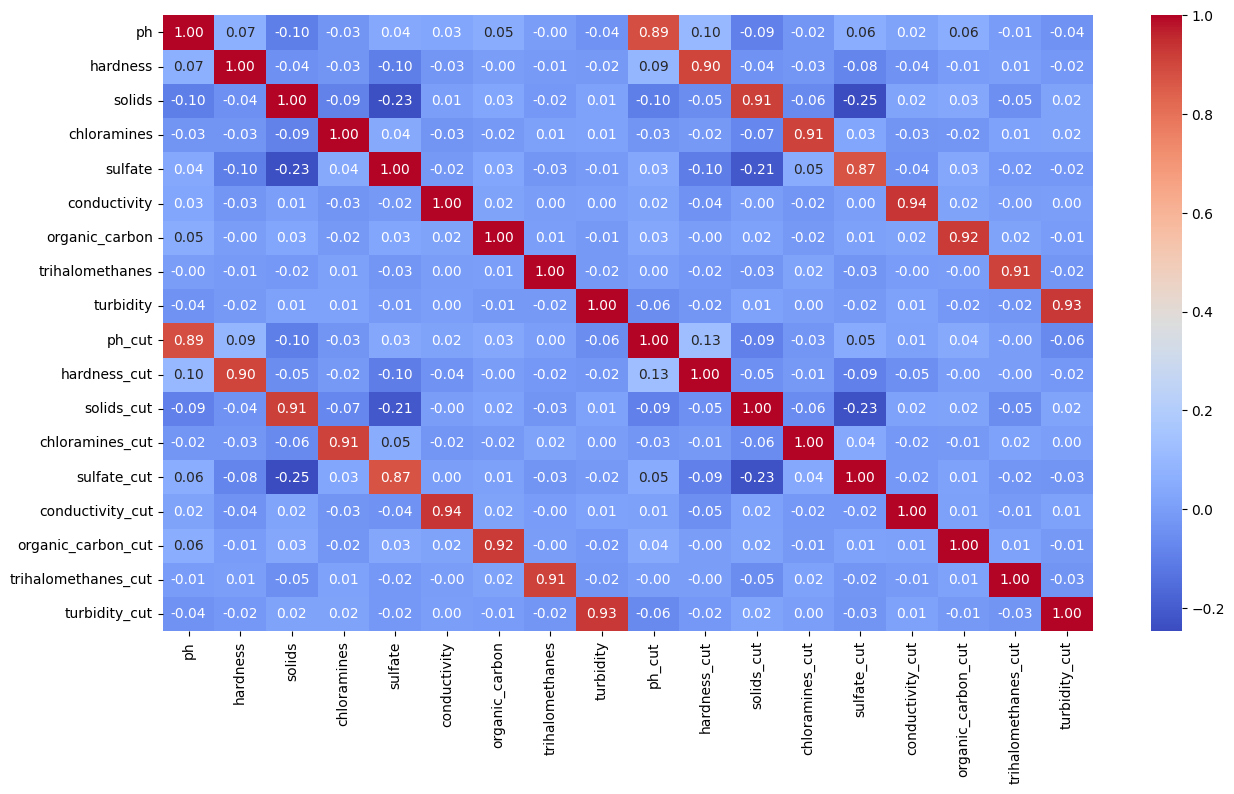

In [77]:
plot_corr(train_cut)

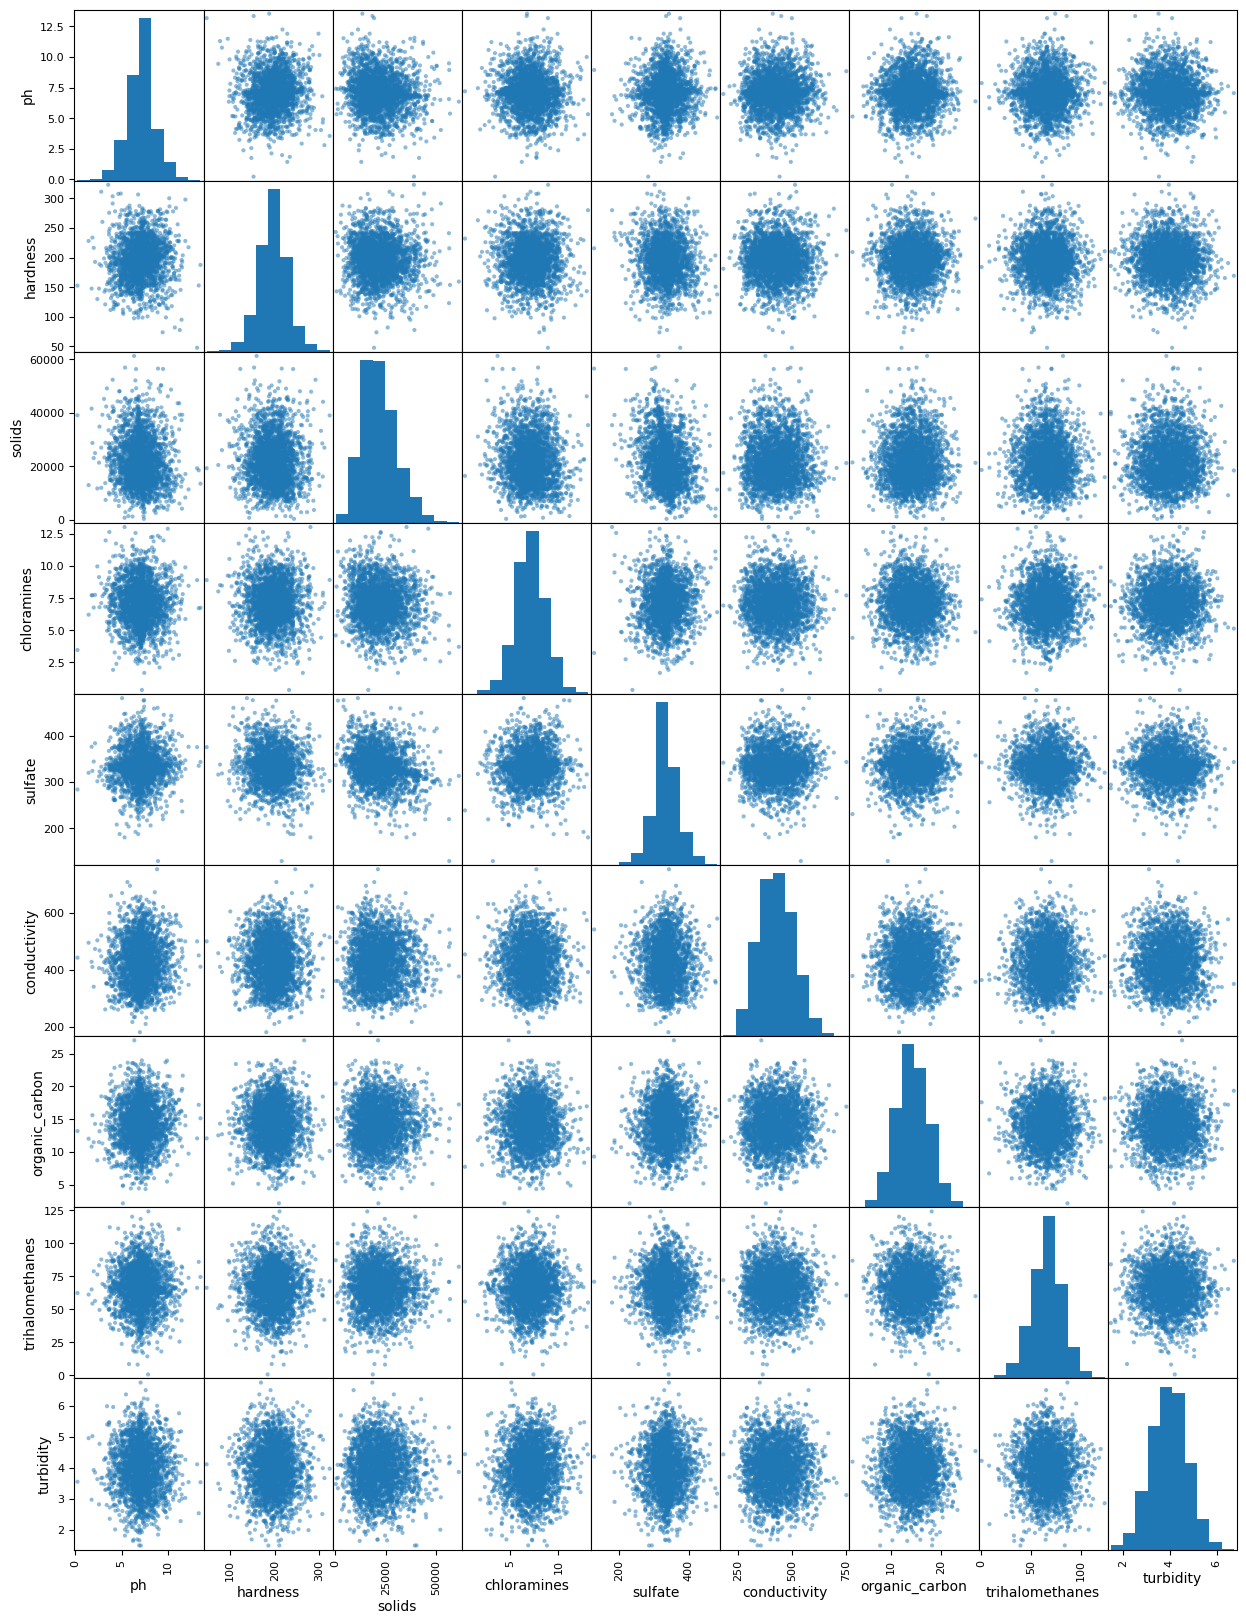

In [78]:
scatter_matrix(train_cut, figsize=(15, 20))
plt.show()

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_cut = ["ph", "hardness"]

preproc_pipe = Pipeline([
    ('columns_lowercase', LowerColumnNames()),
    ('imputer', MultipleImputer()),
    ('numerical_cutter', NumericalCutterAttribs(columns_to_cut)),
    ('scaler', StandardScaler())
])


## **1. Transform Preprocessing**

In [163]:
X_train_prepared = preproc_pipe.fit_transform(train_data)
X_test_prepared = preproc_pipe.transform(test_data)

y_train = np.array(train_target).reshape(-1, 1)
y_test = np.array(test_target).reshape(-1, 1)

# **Model Selection**

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, StratifiedShuffleSplit
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

## **Model Training**


In [165]:
class TestModels():
    def __init__(self, models, section_name='',
                 split_method=None, 
                 X_train=X_train_prepared, 
                 y_train=y_train, 
                 X_test=X_test_prepared,
                 y_test=y_test):
        
        self._models=models[0] if len(models) == 1 else [model for model in models]
        self._X_train=X_train
        self._y_train=y_train
        self._X_test=X_test
        self._y_test=y_test
        self._scores={
            'train' : [],
            'test' : []
        }
        self._split_method = split_method
        self._section_name=section_name

        if isinstance(self._models, list):
            model_names = [model.__class__.__name__ for model in self._models]
        else:
            model_names = [self._models.__class__.__name__]

        print(f"Models for selection :\n\33[32m{model_names}\33[0m")
        print(f"split method: \33[32m{self._split_method.__class__.__name__}\33[0m")
        
    def model_fit(self):
        model_fitted = []

        # if number of model is higher than 1 to be trained
        if isinstance(self._models, list):
            for model in self._models:
                model_fitted.append(model.fit(self._X_train, self._y_train))
        else:
            model_fitted.append(self._models.fit(self._X_train, self._y_train))
            
        return model_fitted
        
    def eval(self):
        # return list of models to be evaluated
        models = self.model_fit() 

        # Iterate through each models to be trained, 
        # if just one model then the data is trained once with particular model.
        for model in models:

            # train with split method
            if self._split_method != None:
                sm = self._split_method
                cv_scores = cross_val_score(model, self._X_train, self._y_train, cv=sm, scoring='accuracy')
                # average of cross validation scores
                score_train = cv_scores.mean()
                score_test = accuracy_score(self._y_test, model.predict(self._X_test))
                
            # train without split method
            else:
                score_train = accuracy_score(self._y_train, model.predict(self._X_train))
                score_test = accuracy_score(self._y_test, model.predict(self._X_test))

            # store train and test score
            self._scores['train'].append(score_train)
            self._scores['test'].append(score_test)
    
        return {
                'model_names' : [model.__class__.__name__ for model in models], 
                self._section_name+'_train_scores' : self._scores['train'], 
                self._section_name+'_test_scores':self._scores['test']
               }

In [166]:
%time
models_dict = {
    'lg' : LogisticRegression(),
    'svm' : SVC(),
    'rf' : RandomForestClassifier(random_state=42),
}

models = [model for model in models_dict.values()]

section_name = 'original'
base_models_test = TestModels(models, section_name=section_name)
models_eval = base_models_test.eval()

score_df = pd.DataFrame(models_eval)
score_df.sort_values(by=[f'{section_name}_train_scores', f'{section_name}_test_scores'], ascending=False)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.7 µs
Models for selection :
['LogisticRegression', 'SVC', 'RandomForestClassifier']
split method: NoneType


model_names  original_train_scores  original_test_scores
2  RandomForestClassifier               1.000000              0.685976
1                     SVC               0.746565              0.679878
0      LogisticRegression               0.609924              0.609756

In [167]:
%%time

# With stratified shuffle split
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

section_name='sss'
base_models_test = TestModels(models, split_method=sss, section_name='sss') 
score_models_sss = base_models_test.eval()

score_sss_df = pd.DataFrame(score_models_sss)
score_sss_df.sort_values(by=[f'{section_name}_train_scores', f'{section_name}_test_scores'], ascending=False)

Models for selection :
['LogisticRegression', 'SVC', 'RandomForestClassifier']
split method: StratifiedShuffleSplit
CPU times: user 3.85 s, sys: 508 ms, total: 4.35 s
Wall time: 3.55 s


model_names  sss_train_scores  sss_test_scores
1                     SVC          0.691794         0.679878
2  RandomForestClassifier          0.665076         0.685976
0      LogisticRegression          0.610687         0.609756

# Resampled data

In [168]:
def plot_cluster(source, hue, title=''):
    sns.scatterplot(data=source, x=source.columns[0], y=source.columns[1], hue=hue)
    plt.title(title)
    plt.show()

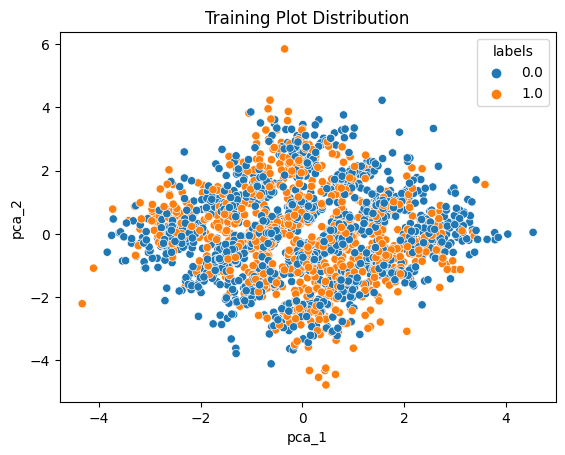

In [169]:
_pca = PCA(n_components=2, random_state=42)
X_train_reduced = _pca.fit_transform(X_train_prepared)

train_reduced = np.c_[X_train_reduced, y_train]
train_reduced_df = pd.DataFrame(train_reduced, columns=['pca_1', 'pca_2', 'labels'])

plot_cluster(train_reduced_df, 'labels', title='Training Plot Distribution')

In [170]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

smote = SMOTE(random_state=42)
train_resampled = smote.fit_resample(X_train_prepared, y_train)
train_resampled = np.c_[train_resampled[1], train_resampled[0]]
train_resampled = shuffle(train_resampled, random_state=42)

X_train_resampled = train_resampled[:, 1:]
y_train_resampled = train_resampled[:, 0]

X_train_resampled[:5], y_train_resampled[:5]

(array([[ 6.77309189e-01,  5.28150982e-01, -2.26562619e-02,
          1.03534092e+00, -2.44612623e-01,  9.91007648e-01,
          8.39059051e-01,  6.00822048e-04,  1.63209223e+00,
          1.34164079e+00,  4.47213595e-01],
        [-1.57085779e+00, -7.56517644e-03, -3.08534016e-01,
         -1.35931719e+00, -1.32122892e-01,  3.85127112e-01,
         -2.73605813e-01,  1.16782641e+00,  5.23433025e-01,
         -1.34164079e+00, -4.47213595e-01],
        [ 1.70132283e-01, -3.06137275e-01,  3.56159489e-01,
         -8.40040678e-01, -1.25270967e+00,  1.12680660e+00,
         -5.79777511e-01,  5.17597840e-01,  3.68821668e-01,
          7.45602934e-02, -4.47213595e-01],
        [-8.46685266e-01, -5.83464944e-02, -4.75667976e-01,
         -9.19414402e-01,  2.09089666e+00,  2.41012830e+00,
          1.01847093e+00,  1.70520927e+00,  3.38092811e-01,
         -1.34164079e+00, -4.47213595e-01],
        [-2.27593237e-01,  2.10827841e-01,  5.06682841e-01,
          7.81222263e-01,  2.16918730e-01, -

In [171]:
test_resampled = smote.fit_resample(X_test_prepared, y_test)
test_resampled = np.c_[test_resampled[1], test_resampled[0]]
test_resampled = shuffle(test_resampled, random_state=42)

X_test_resampled = test_resampled[:, 1:]
y_test_resampled = test_resampled[:, 0]

X_test_resampled[:5], y_test_resampled[:5]

(array([[-0.47479032,  0.04051918, -0.12559927, -0.0538216 ,  0.3413632 ,
          0.52249292, -0.6874182 , -0.158648  , -0.20487916, -0.73279932,
          0.4472136 ],
        [-1.57519337,  0.31114267,  0.7743368 , -1.38002785, -0.44796107,
          0.93464104, -0.06997474, -0.02496656,  1.26684283, -1.34164079,
          0.53054877],
        [-1.6645009 , -0.43213498,  1.41279975, -0.57454362, -0.72569968,
          0.1384169 , -1.97573597,  0.13316748,  0.19322796, -1.34164079,
         -0.4472136 ],
        [-0.8931901 ,  0.51614931,  0.48374653,  0.94711537, -1.66125128,
          0.46514516, -1.90129404, -0.39116875,  3.23056693, -1.34164079,
          0.4472136 ],
        [ 0.33122554,  1.4063903 , -1.38206149, -0.44793524, -3.34266144,
         -0.93809507, -1.17280414,  0.23858364,  0.83686739,  0.4472136 ,
          1.34164079]]),
 array([1., 1., 1., 1., 1.]))

<Axes: >

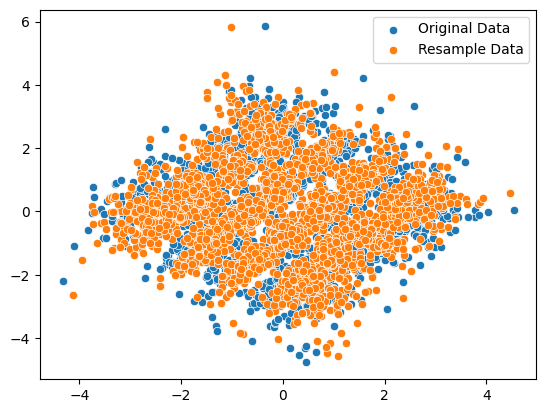

In [172]:
X_train_resampled_reduced = _pca.fit_transform(X_train_resampled)
sns.scatterplot(x=X_train_reduced[:,0],y=X_train_reduced[:, 1], label='Original Data')
sns.scatterplot(x=X_train_resampled_reduced[:, 0], y=X_train_resampled_reduced[:, 1], label='Resample Data')

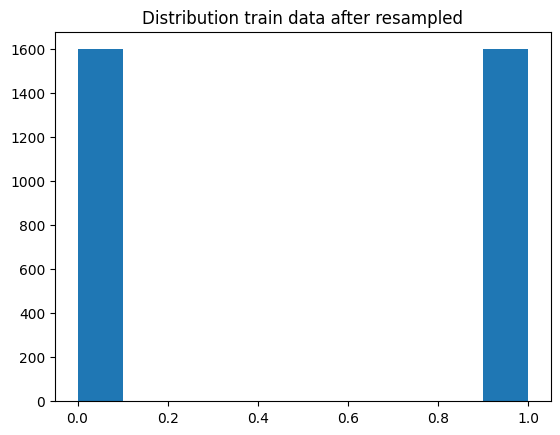

In [173]:
plt.hist(y_train_resampled)
plt.title('Distribution train data after resampled')
plt.show()

In [174]:
# Retraining on resampled data

section_name='resampled'
models_test_resampled = TestModels(models,
                                   section_name=section_name, 
                                   X_train=X_train_resampled, 
                                   y_train=y_train_resampled, 
                                   X_test=X_test_resampled,
                                   y_test=y_test_resampled
                                  )
models_eval_resampled = models_test_resampled.eval()

score_resampled_df = pd.DataFrame(models_eval_resampled)
score_resampled_df.sort_values(by=[f'{section_name}_train_scores', f'{section_name}_test_scores'], ascending=False)

Models for selection :
['LogisticRegression', 'SVC', 'RandomForestClassifier']
split method: NoneType


model_names  resampled_train_scores  resampled_test_scores
2  RandomForestClassifier                1.000000                0.64875
1                     SVC                0.765957                0.62625
0      LogisticRegression                0.509387                0.55250

# Search Tune

In [231]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [232]:
%%time
params_rf = {
    'n_estimators' : [100, 150, 250, 850],
    'max_depth' : [25, 35, 85, None],
    'min_samples_split' : [2, 15, 20, 30, 35],
    'min_samples_leaf' : [1, 15, 20]
}

grid_search_rf = GridSearchCV(estimator=models_dict['rf'], 
                                      param_grid=params_rf, 
                                      verbose=3, 
                                      cv=2, 
                                      scoring='accuracy', 
                                      return_train_score=True)


grid_search_rf.fit(X_train_resampled, y_train_resampled)

Fitting 2 folds for each of 240 candidates, totalling 480 fits
[CV 1/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.687) total time=   0.6s
[CV 2/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.718) total time=   0.6s
[CV 1/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.694) total time=   0.9s
[CV 2/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.723) total time=   0.9s
[CV 1/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=(train=1.000, test=0.697) total time=   1.5s
[CV 2/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=(train=1.000, test=0.724) total time=   1.6s
[CV 1/2] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=850;, score=(train=1.000, te

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [25, 35, 85, None],
                         'min_samples_leaf': [1, 15, 20],
                         'min_samples_split': [2, 15, 20, 30, 35],
                         'n_estimators': [100, 150, 250, 850]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [235]:
print(search_best)

RandomForestClassifier(max_depth=35, n_estimators=850, random_state=42)


In [236]:
search_best = grid_search_rf.best_estimator_
TestModels([search_best], X_train=X_train_resampled, y_train=y_train_resampled, X_test=X_test_prepared).eval()

Models for selection :
['RandomForestClassifier']
split method: NoneType


{'model_names': ['RandomForestClassifier'],
 '_train_scores': [1.0],
 '_test_scores': [0.6661585365853658]}

In [252]:
rf_final = RandomForestClassifier(n_estimators=850, max_depth=35, random_state=42)
TestModels([rf], X_train=X_train_resampled, y_train=y_train_resampled, X_test=X_test_prepared).eval()

Models for selection :
['RandomForestClassifier']
split method: NoneType


{'model_names': ['RandomForestClassifier'],
 '_train_scores': [1.0],
 '_test_scores': [0.6661585365853658]}

# **Evaluation**

In [238]:
from sklearn.model_selection import learning_curve, LearningCurveDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

In [239]:
y_train_resampled.shape

(3196,)

In [240]:
X_train_final = X_train_resampled
y_train_final = y_train_resampled

X_test_final = X_test_prepared
y_test_final = y_test

X_train_final.shape, X_test_final.shape

((3196, 11), (656, 11))

In [241]:
def plot_learning_curve(train_scores, test_scores):   
    plt.figure()
    plt.plot(train_sizes, train_scores, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores, 'o-', label="Testing score")
    plt.xlabel("Training Sizes")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

[learning_curve] Training set sizes: [ 575  949 1438 2013 2588]
[CV] END ..................., score=(train=1.000, test=0.594) total time=   2.3s
[CV] END ..................., score=(train=1.000, test=0.625) total time=   3.4s
[CV] END ..................., score=(train=1.000, test=0.700) total time=   4.7s
[CV] END ..................., score=(train=1.000, test=0.725) total time=   6.4s
[CV] END ..................., score=(train=1.000, test=0.756) total time=   7.9s
[CV] END ..................., score=(train=1.000, test=0.634) total time=   2.4s
[CV] END ..................., score=(train=1.000, test=0.619) total time=   3.2s
[CV] END ..................., score=(train=1.000, test=0.688) total time=   4.7s
[CV] END ..................., score=(train=1.000, test=0.694) total time=   6.2s
[CV] END ..................., score=(train=1.000, test=0.734) total time=   7.9s
[CV] END ..................., score=(train=1.000, test=0.606) total time=   2.3s
[CV] END ..................., score=(train=1.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:  1.4min


[CV] END ..................., score=(train=1.000, test=0.725) total time=   4.5s
[CV] END ..................., score=(train=1.000, test=0.703) total time=   6.0s
[CV] END ..................., score=(train=1.000, test=0.719) total time=   7.8s
[CV] END ..................., score=(train=1.000, test=0.562) total time=   2.3s
[CV] END ..................., score=(train=1.000, test=0.616) total time=   3.4s
[CV] END ..................., score=(train=1.000, test=0.675) total time=   4.6s
[CV] END ..................., score=(train=1.000, test=0.738) total time=   6.3s
[CV] END ..................., score=(train=1.000, test=0.738) total time=   7.8s
[CV] END ..................., score=(train=1.000, test=0.637) total time=   2.3s
[CV] END ..................., score=(train=1.000, test=0.697) total time=   3.2s
[CV] END ..................., score=(train=1.000, test=0.703) total time=   4.5s
[CV] END ..................., score=(train=1.000, test=0.728) total time=   6.1s
[CV] END ...................

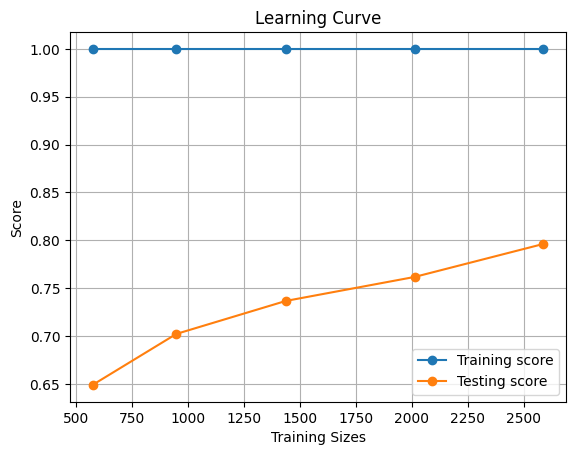

In [244]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_final,
    X_train_final, 
    y_train_final, 
    verbose=5, 
    shuffle=True, 
    cv=10, 
    n_jobs=2,
    train_sizes=[0.2, 0.33, 0.5, 0.7, 0.9]
)

train_scores_max = np.max(train_scores, axis=1)
test_scores_max = np.max(test_scores, axis=1)

plot_learning_curve(train_scores_max, test_scores_max)

## **Confusion Matrix**

test accuracy: 0.6661585365853658


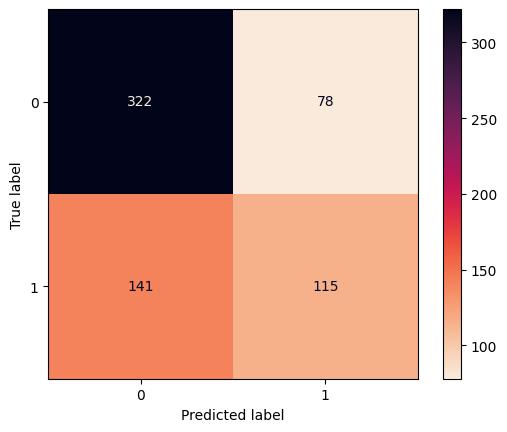

In [249]:
model = rf_final
model.fit(X_train_final, y_train_final)

y_test_pred = model.predict(X_test_final)

print(f"test accuracy: {accuracy_score(y_test_final, y_test_pred)}")

ConfusionMatrixDisplay.from_estimator(model, X_test_final, y_test_final, cmap='rocket_r')

## **Classification Report**

th=0.67



precision    recall  f1-score     support
non potable    0.641694  0.985000  0.777120  400.000000
potable        0.857143  0.140625  0.241611  256.000000
accuracy       0.655488  0.655488  0.655488    0.655488
macro avg      0.749418  0.562812  0.509366  656.000000
weighted avg   0.725771  0.655488  0.568141  656.000000

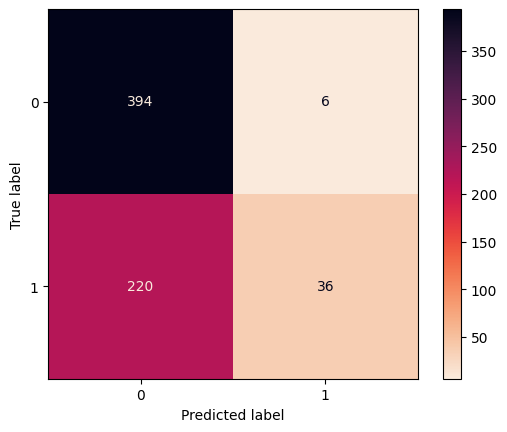

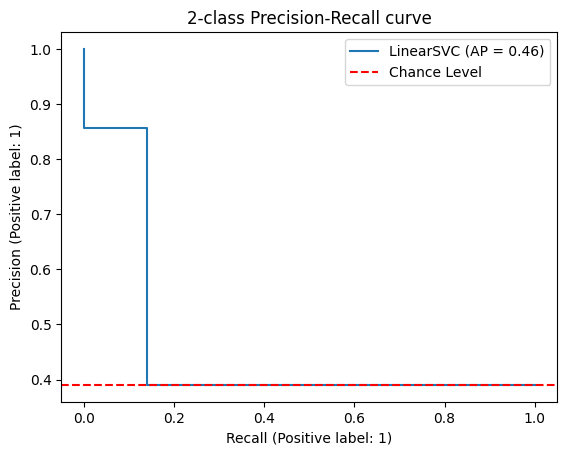

In [259]:
# Probabilities for the positive class (column 1)
y_test_proba = model.predict_proba(X_test_final)[:, 1]

threshold = 0.67

# Apply the threshold
predictions = np.where(y_test_proba > threshold, 1, 0)

target_names = ['non potable', 'potable']

report_cls = classification_report(y_test_final, 
                               predictions, 
                               target_names=target_names, 
                               output_dict=True)
print(f"th={threshold}\n")
display(pd.DataFrame(report_cls).T)
display(ConfusionMatrixDisplay.from_predictions(y_test_final, predictions, cmap='rocket_r'))

display_prec_rec = PrecisionRecallDisplay.from_predictions(
    y_test_final, predictions, name="LinearSVC",
)
_ = display_prec_rec.ax_.set_title("2-class Precision-Recall curve")

baseline_precision = sum(y_test_final) / len(y_test_final)  # Proportion of positives
plt.axhline(y=baseline_precision, color="red", linestyle="--", label="Chance Level")
plt.legend()

display(display_prec_rec)

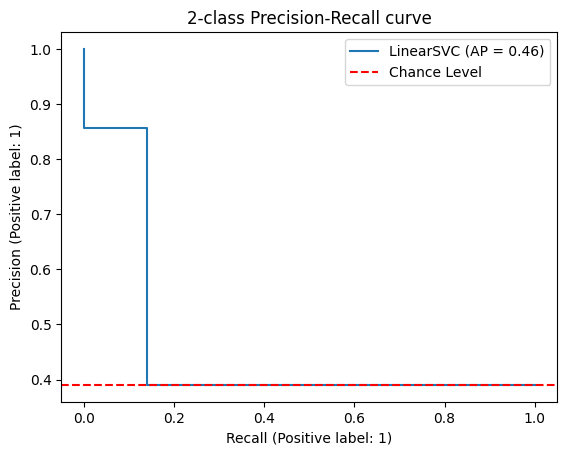

In [255]:
display_prec_rec = PrecisionRecallDisplay.from_predictions(
    y_test_final, predictions, name="LinearSVC",
)
_ = display_prec_rec.ax_.set_title("2-class Precision-Recall curve")

baseline_precision = sum(y_test_final) / len(y_test_final)  # Proportion of positives
plt.axhline(y=baseline_precision, color="red", linestyle="--", label="Chance Level")
plt.legend()